In [1]:
# Filename key:

# Masses
# hr.5A 0.5 Msol
# hr.6A 0.6 Msol
# hr.7A 0.7 Msol
# hr.8A 0.8 Msol
# hr.9A 0.9 Msol
# hr.0A 1.0 Msol
# hr.1A 1.1 Msol
# hr.2A 1.2 Msol

# Metallicities
# hr.0G 0.1 Zsol
# hr.0H 0.2 Zsol
# hr.0I 0.3 Zsol
# hr.0J 0.4 Zsol
# hr.0K 0.5 Zsol
# hr.0L 0.6 Zsol
# hr.0M 0.7 Zsol
# hr.0N 0.8 Zsol
# hr.0O 0.9 Zsol
# hr.0A 1.0 Zsol
# hr.0Q 1.1 Zsol
# hr.0R 1.2 Zsol
# hr.0S 1.3 Zsol
# hr.0T 1.4 Zsol
# hr.0F 1.5 Zsol

# O/Fe
# hr.0E 0.44 O/Fe_sol
# hr.0D 0.67 O/Fe_sol
# hr.0A 1.0 O/Fe_sol
# hr.0B 1.48 O/Fe_sol
# hr.0C 2.28 O/Fe_sol

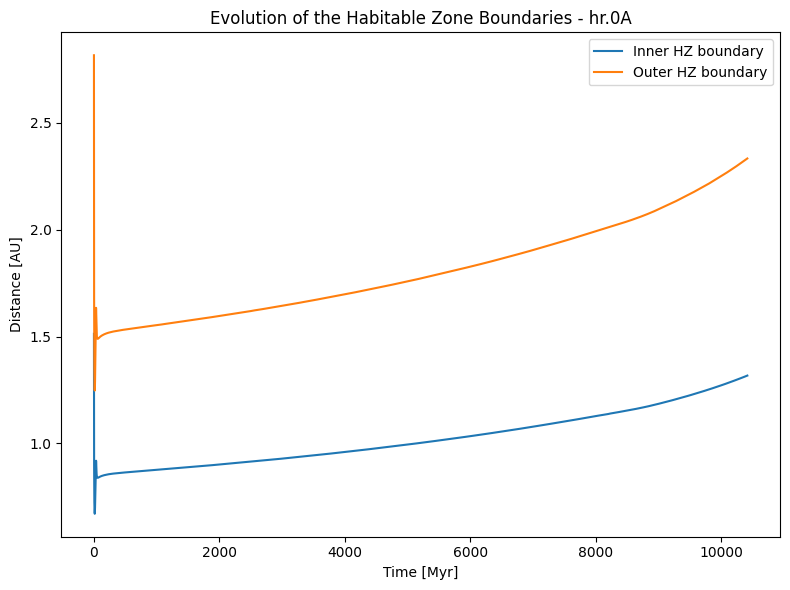

In [36]:
# Only using hr.0A

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

filename = 'hr.0A'
dataframe_hr = pd.read_table(filename, sep=r'\s+', names=np.arange(14))

nrows = dataframe_hr.shape[0]

T_log_array = []
L_log_array = []
time_array = []

for i in range(nrows):
    if i % 19 == 0:
        try:
            log_T = float(dataframe_hr.iloc[i, 8])
            log_L = float(dataframe_hr.iloc[i, 7])
            time  = float(dataframe_hr.iloc[i, 2])

            T_log_array.append(log_T)
            L_log_array.append(log_L)
            time_array.append(time)

        except (ValueError, IndexError) as e:
            print(f"Issue at row {i}: {e}")
            continue

T_log_array = np.array(T_log_array)
L_log_array = np.array(L_log_array)
time_array = np.array(time_array)

T_eff_array = 10**T_log_array
L_Lsol_array = 10**L_log_array
time_myr = time_array / (1.0e6 * 3.154e7)

S_eff_sun_in  = 1.107
a_in          = 1.332e-4
b_in          = 1.5080e-8
c_in          = -8.308e-12
d_in          = -1.931e-15

S_eff_sun_out = 0.356
a_out         = 6.171e-5
b_out         = 1.698e-9
c_out         = -3.198e-12
d_out         = -5.575e-16

d_in_array = []
d_out_array = []

for T_eff in T_eff_array:
    T_star = T_eff - 5780.0

    S_eff_in = (S_eff_sun_in
                + a_in * T_star
                + b_in * (T_star**2)
                + c_in * (T_star**3)
                + d_in * (T_star**4))

    S_eff_out = (S_eff_sun_out
                 + a_out * T_star
                 + b_out * (T_star**2)
                 + c_out * (T_star**3)
                 + d_out * (T_star**4))

    d_in_array.append(S_eff_in)
    d_out_array.append(S_eff_out)

d_in_array = np.array(d_in_array)
d_out_array = np.array(d_out_array)

hz_in_au = np.sqrt(L_Lsol_array / d_in_array)
hz_out_au = np.sqrt(L_Lsol_array / d_out_array)

plt.figure(figsize=(8,6))
plt.plot(time_myr, hz_in_au, label='Inner HZ boundary')
plt.plot(time_myr, hz_out_au, label='Outer HZ boundary')
plt.xlabel('Time [Myr]')
plt.ylabel('Distance [AU]')
plt.title('Evolution of the Habitable Zone Boundaries - hr.0A')
plt.legend()
plt.tight_layout()
plt.savefig("hr0A.png", dpi=300, bbox_inches='tight')
plt.show()

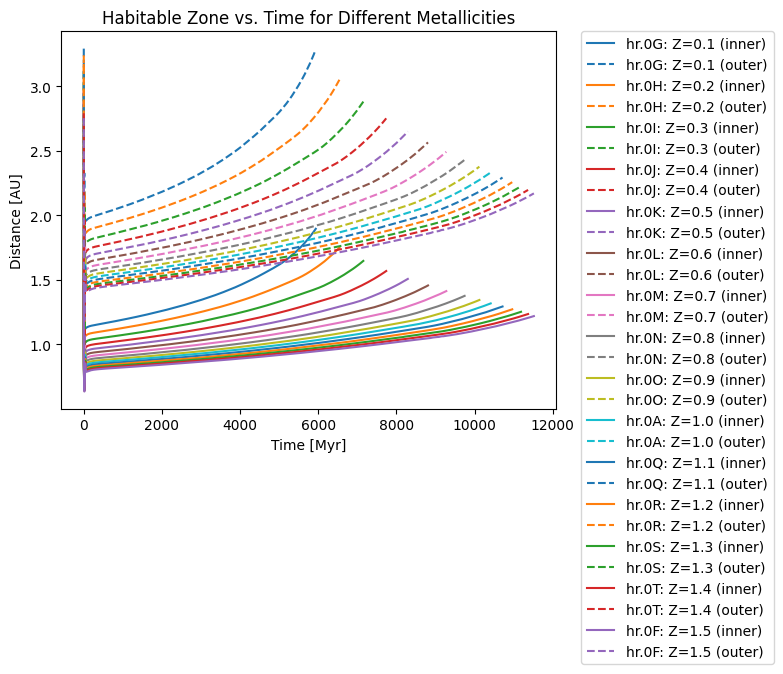

In [2]:
# metalliciy plot
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

base_dir = "1msol-z/"

metallicity_files = {
    "hr.0G": 0.1,
    "hr.0H": 0.2,
    "hr.0I": 0.3,
    "hr.0J": 0.4,
    "hr.0K": 0.5,
    "hr.0L": 0.6,
    "hr.0M": 0.7,
    "hr.0N": 0.8,
    "hr.0O": 0.9,
    "hr.0A": 1.0,
    "hr.0Q": 1.1,
    "hr.0R": 1.2,
    "hr.0S": 1.3,
    "hr.0T": 1.4,
    "hr.0F": 1.5,
}

tracks = {}

for fname, z_val in metallicity_files.items():
    full_path = os.path.join(base_dir, fname)
    df = pd.read_table(full_path, sep=r'\s+', names=np.arange(14))

    nrows = df.shape[0]
    T_log_array = []
    L_log_array = []
    time_array = []

    for i in range(nrows):
        if i % 19 == 0:
            try:
                log_T = float(df.iloc[i, 8])
                log_L = float(df.iloc[i, 7])
                time_sec = float(df.iloc[i, 2])
                T_log_array.append(log_T)
                L_log_array.append(log_L)
                time_array.append(time_sec)
            except (ValueError, IndexError):
                continue

    T_log_array = np.array(T_log_array)
    L_log_array = np.array(L_log_array)
    time_array = np.array(time_array)

    T_eff_array = 10**T_log_array
    L_Lsol_array = 10**L_log_array
    time_myr = time_array / (1.0e6 * 3.154e7)

    S_eff_sun_in  = 1.107
    a_in          = 1.332e-4
    b_in          = 1.5080e-8
    c_in          = -8.308e-12
    d_in          = -1.931e-15

    S_eff_sun_out = 0.356
    a_out         = 6.171e-5
    b_out         = 1.698e-9
    c_out         = -3.198e-12
    d_out         = -5.575e-16

    d_in_list = []
    d_out_list = []

    for T_eff in T_eff_array:
        T_star = T_eff - 5780.0
        S_eff_in = (S_eff_sun_in
                    + a_in*T_star
                    + b_in*(T_star**2)
                    + c_in*(T_star**3)
                    + d_in*(T_star**4))
        S_eff_out = (S_eff_sun_out
                     + a_out*T_star
                     + b_out*(T_star**2)
                     + c_out*(T_star**3)
                     + d_out*(T_star**4))

        d_in_list.append(S_eff_in)
        d_out_list.append(S_eff_out)

    d_in_array = np.array(d_in_list)
    d_out_array = np.array(d_out_list)

    hz_in_au = np.sqrt(L_Lsol_array / d_in_array)
    hz_out_au = np.sqrt(L_Lsol_array / d_out_array)

    tracks[fname] = {
        "Z": z_val,
        "time_myr": time_myr,
        "hz_in_au": hz_in_au,
        "hz_out_au": hz_out_au,
    }

plt.figure(figsize=(8, 6))

sorted_z = sorted(tracks.items(), key=lambda item: item[1]["Z"])

for i, (fname, data) in enumerate(sorted_z):
    color = f"C{i}"

    plt.plot(
        data["time_myr"], data["hz_in_au"],
        linestyle='-', color=color,
        label=f"{fname}: Z={data['Z']} (inner)"
    )

    plt.plot(
        data["time_myr"], data["hz_out_au"],
        linestyle='--', color=color,
        label=f"{fname}: Z={data['Z']} (outer)"
    )

plt.xlabel("Time [Myr]")
plt.ylabel("Distance [AU]")
plt.title("Habitable Zone vs. Time for Different Metallicities")

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.savefig("metallicities.png", dpi=300, bbox_inches='tight')
plt.show()


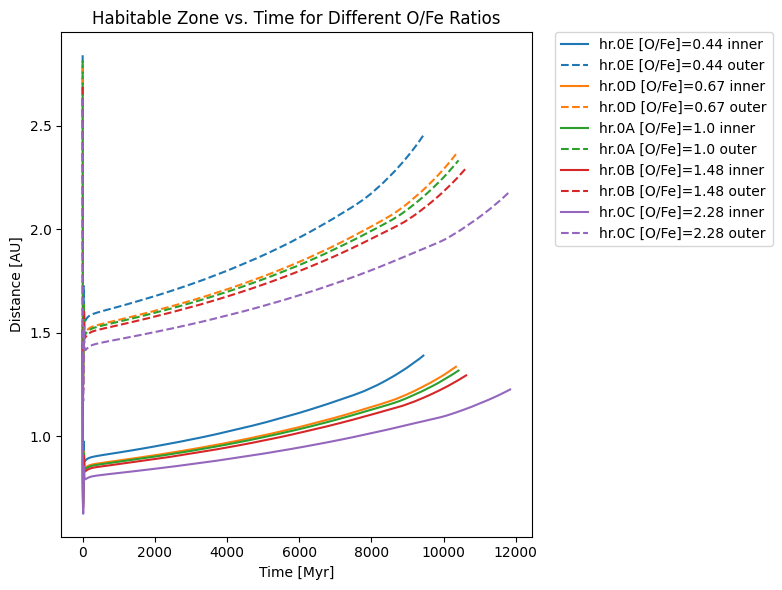

In [5]:
# O/Fe

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

base_dir = "1msol-ofe/"

ofe_files = {
    "hr.0E": 0.44,
    "hr.0D": 0.67,
    "hr.0A": 1.0,
    "hr.0B": 1.48,
    "hr.0C": 2.28,
}

tracks_ofe = {}

for fname, ofe_val in ofe_files.items():
    full_path = os.path.join(base_dir, fname)
    df = pd.read_table(full_path, sep=r'\s+', names=np.arange(14))

    nrows = df.shape[0]
    T_log_array = []
    L_log_array = []
    time_array = []

    for i in range(nrows):
        if i % 19 == 0:
            try:
                log_T = float(df.iloc[i, 8])
                log_L = float(df.iloc[i, 7])
                time_sec = float(df.iloc[i, 2])

                T_log_array.append(log_T)
                L_log_array.append(log_L)
                time_array.append(time_sec)
            except (ValueError, IndexError):
                continue

    T_log_array = np.array(T_log_array)
    L_log_array = np.array(L_log_array)
    time_array = np.array(time_array)

    T_eff_array = 10**T_log_array
    L_Lsol_array = 10**L_log_array
    time_myr = time_array / (1.0e6 * 3.154e7)

    S_eff_sun_in  = 1.107
    a_in          = 1.332e-4
    b_in          = 1.5080e-8
    c_in          = -8.308e-12
    d_in          = -1.931e-15

    S_eff_sun_out = 0.356
    a_out         = 6.171e-5
    b_out         = 1.698e-9
    c_out         = -3.198e-12
    d_out         = -5.575e-16

    d_in_list = []
    d_out_list = []

    for T_eff in T_eff_array:
        T_star = T_eff - 5780.0
        
        S_eff_in = (S_eff_sun_in
                    + a_in*T_star
                    + b_in*(T_star**2)
                    + c_in*(T_star**3)
                    + d_in*(T_star**4))
        
        S_eff_out = (S_eff_sun_out
                     + a_out*T_star
                     + b_out*(T_star**2)
                     + c_out*(T_star**3)
                     + d_out*(T_star**4))

        d_in_list.append(S_eff_in)
        d_out_list.append(S_eff_out)

    d_in_array = np.array(d_in_list)
    d_out_array = np.array(d_out_list)

    hz_in_au = np.sqrt(L_Lsol_array / d_in_array)
    hz_out_au = np.sqrt(L_Lsol_array / d_out_array)

    tracks_ofe[fname] = {
        "time_myr": time_myr,
        "hz_in_au": hz_in_au,
        "hz_out_au": hz_out_au,
        "ofe": ofe_val,
    }

plt.figure(figsize=(8, 6))

sorted_ofe = sorted(tracks_ofe.items(), key=lambda item: item[1]["ofe"])

for i, (fname, data) in enumerate(sorted_ofe):
    color = f"C{i}"

    plt.plot(
        data["time_myr"], data["hz_in_au"],
        linestyle='-', color=color,
        label=f"{fname} [O/Fe]={data['ofe']} inner"
    )

    plt.plot(
        data["time_myr"], data["hz_out_au"],
        linestyle='--', color=color,
        label=f"{fname} [O/Fe]={data['ofe']} outer"
    )

plt.xlabel("Time [Myr]")
plt.ylabel("Distance [AU]")
plt.title("Habitable Zone vs. Time for Different O/Fe Ratios")

plt.legend(
    loc='upper left',
    bbox_to_anchor=(1.05, 1),
    borderaxespad=0.
)

plt.tight_layout()
plt.savefig("Ofe.png", dpi=300, bbox_inches='tight')
plt.show()


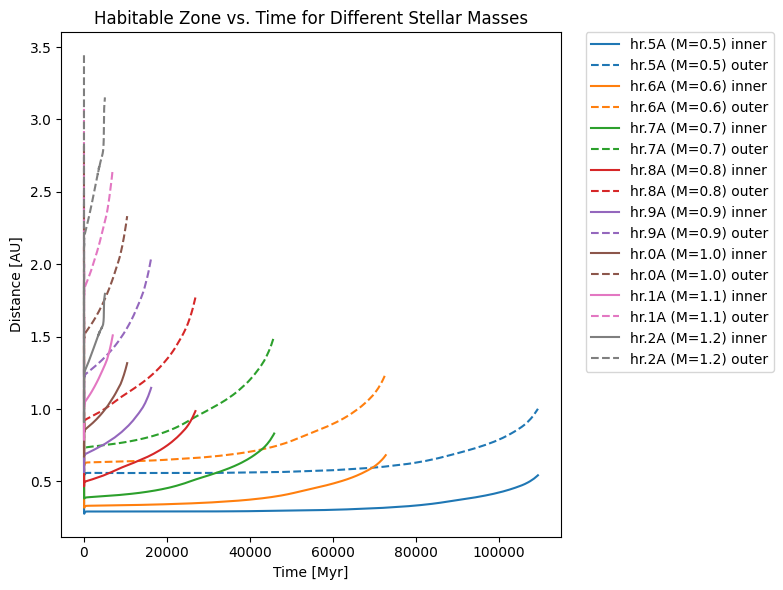

In [6]:
# stellar masses

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

base_dir = "1Z-mass/"  

mass_files = {
    "hr.5A": 0.5,
    "hr.6A": 0.6,
    "hr.7A": 0.7,
    "hr.8A": 0.8,
    "hr.9A": 0.9,
    "hr.0A": 1.0,
    "hr.1A": 1.1,
    "hr.2A": 1.2,
}

tracks = {}

for fname, mass_val in mass_files.items():
    full_path = os.path.join(base_dir, fname)
    df = pd.read_table(full_path, sep=r'\s+', names=np.arange(14))

    nrows = df.shape[0]
    T_log_array = []
    L_log_array = []
    time_array = []

    for i in range(nrows):
        if i % 19 == 0:
            try:
                log_T = float(df.iloc[i, 8])
                log_L = float(df.iloc[i, 7])
                time_sec = float(df.iloc[i, 2])

                T_log_array.append(log_T)
                L_log_array.append(log_L)
                time_array.append(time_sec)
            except (ValueError, IndexError):
                continue

    T_log_array = np.array(T_log_array)
    L_log_array = np.array(L_log_array)
    time_array = np.array(time_array)

    T_eff_array = 10**T_log_array
    L_Lsol_array = 10**L_log_array
    time_myr = time_array / (1.0e6 * 3.154e7)

    S_eff_sun_in  = 1.107
    a_in          = 1.332e-4
    b_in          = 1.5080e-8
    c_in          = -8.308e-12
    d_in          = -1.931e-15

    S_eff_sun_out = 0.356
    a_out         = 6.171e-5
    b_out         = 1.698e-9
    c_out         = -3.198e-12
    d_out         = -5.575e-16

    d_in_list = []
    d_out_list = []

    for T_eff in T_eff_array:
        T_star = T_eff - 5780.0
        S_eff_in = (S_eff_sun_in
                    + a_in*T_star
                    + b_in*(T_star**2)
                    + c_in*(T_star**3)
                    + d_in*(T_star**4))
        S_eff_out = (S_eff_sun_out
                     + a_out*T_star
                     + b_out*(T_star**2)
                     + c_out*(T_star**3)
                     + d_out*(T_star**4))

        d_in_list.append(S_eff_in)
        d_out_list.append(S_eff_out)

    d_in_array = np.array(d_in_list)
    d_out_array = np.array(d_out_list)

    hz_in_au = np.sqrt(L_Lsol_array / d_in_array)
    hz_out_au = np.sqrt(L_Lsol_array / d_out_array)

    tracks[fname] = {
        "mass": mass_val,
        "time_myr": time_myr,
        "hz_in_au": hz_in_au,
        "hz_out_au": hz_out_au,
    }

plt.figure(figsize=(8, 6))

sorted_tracks = sorted(tracks.items(), key=lambda item: item[1]["mass"])

for i, (fname, data) in enumerate(sorted_tracks):
    color = f"C{i}"  

    plt.plot(
        data["time_myr"], data["hz_in_au"],
        linestyle='-', color=color,
        label=f"{fname} (M={data['mass']}) inner"
    )

    plt.plot(
        data["time_myr"], data["hz_out_au"],
        linestyle='--', color=color,
        label=f"{fname} (M={data['mass']}) outer"
    )

plt.xlabel("Time [Myr]")
plt.ylabel("Distance [AU]")
plt.title("Habitable Zone vs. Time for Different Stellar Masses")

plt.legend(
    loc='upper left',
    bbox_to_anchor=(1.05, 1),
    borderaxespad=0.
)

plt.tight_layout()
plt.savefig("mass.png", dpi=300, bbox_inches='tight')
plt.show()
